In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc

import numpy as np

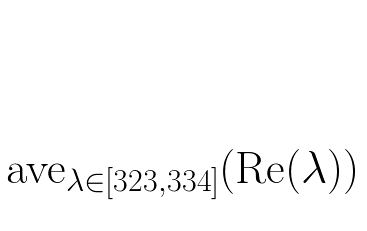

In [2]:
def imager(str_eq):
    
    rc('text', usetex=True)
    rc('font', family='serif')


    plt.text(0,0.15, str_eq, fontsize=46)
    plt.axis('off')
#     plt.ylim(0,)

    plt.show()
eqsample = r"\begin{eqnarray*}R_L&= 0\\ V_2&= 1\\ I_2&= 2\end{eqnarray*}"
# r'{0}'.format(s)

# imager(eqsample)\cdot
# imager(r'\[\frac{ \sum_{i=0}^{9}{\left(Re(i)\right)}}{n} \]')
# imager(r'{\overline{\mathrm{Re}(\lambda\in[' + r'{},{}'.format(48,56) + r'])}}')
#\frac{1}{\lambda} \cdot \sum_{\lambda \in [420,480]}{Re(\lambda)}
# imager(r'$\overline{\mathrm{Re}(\lambda\in[' + r'{},{}'.format(48,56) + r'])}$')
imager( r'\[\mathrm{ave}_{\lambda\in[' + r'{},{}'.format(323, 334) + r']}(\mathrm{Re}(\lambda))\]')
# imager(r'{\overline{\mathrm{Re}(\lambda\in[48,56])}}$')

In [3]:
eqin = "(2*mean[420,480]- mean[490, 780])/( max[666,700] + sin(mean[490,780]) + (tan(mean[500,600]))/(sin(min[650,700])))"

In [4]:
#first remove the all spaces:
eqin_nospace = eqin.replace(" ", "")
eqin_nospace

'(2*mean[420,480]-mean[490,780])/(max[666,700]+sin(mean[490,780])+(tan(mean[500,600]))/(sin(min[650,700])))'

In [5]:
#then split it with multiple delimeters
import re
regexPattern = '|'.join(map(re.escape, ['*','+','/','-','(',')']))
eq_var_n_cons = re.split(regexPattern, eqin_nospace)

print(regexPattern, '\n', eq_var_n_cons)

\*|\+|\/|\-|\(|\) 
 ['', '2', 'mean[420,480]', 'mean[490,780]', '', '', 'max[666,700]', 'sin', 'mean[490,780]', '', '', 'tan', 'mean[500,600]', '', '', '', 'sin', 'min[650,700]', '', '', '']


In [6]:
def checkVariableLegit(s):
    keyword = ''
    if "mean" in s:
        keyword = 'm'
    elif "max" in s:
        keyword = 'x'
    elif "min" in s:
        keyword = 'n'
    else:
        return False

    if len(re.findall("\d+", s)) == 2:
        return True
    else:
        return False


In [7]:
# constant = {}
# variable = {}

# varCount = 0
# for element in eq_var_n_cons:
#     if element == '':
#         continue
#     try:
#         tmp = float(element)
#         constant[element] = tmp
#     except:
#         if checkVariableLegit(element):
#             if not (element in variable.values()): 
#                 varName = "var" + str(varCount)
#                 variable[varName] = element
#                 varCount+=1
#         else:
#             print("error")
# print(constant)
# print(variable)

In [8]:
# #replace the equation with semivar
# proto_eq = eqin_nospace
# for i in range(len(variable)):
#     proto_eq = proto_eq.replace(list(variable.values())[i], list(variable.keys())[i])
# print(proto_eq)

In [106]:
import pandas as pd
s = '/home/garid/myGithub/gimbalSoft_wl/0706/2019-12-21/11h_ザルディbad/20191221_111801_crop.csv'
import pandas as pd

# dat = np.array(pd.read_csv(s))
# pd.read_csv(s)

readData = np.array(pd.read_csv(s))
calcRef = np.zeros((readData.shape[0], 2))
calcRef[:,0] = readData[:,1]
calcRef[:,1] = (readData[:,2] - 16) / (readData[:,4] - 16)

class written_var():
    def __init__(self, s, varAbbre):
        self.full = s
        self.legit = True
        self.keyword = ''
        if "mean" in s:
            self.keyword = 'm'
        elif "max" in s:
            self.keyword = 'x'
        elif "min" in s:
            self.keyword = 'n'
        else:
            self.legit = False

        self.startWL = 0
        self.end__WL = 0
        if len(re.findall("\d+", s)) == 2:
            try:
                self.startWL, self.end__WL = [int(s) for s in re.findall("\d+", s)]
            except:
                self.legit = False
        else:
            self.legit = False
        self.varName = varAbbre
        self.varNameLatex = 'var_{' + (varAbbre[3:]) + '}'
        
        self.val = self.Value()
        self.latex = self.Latex()
    def Value(self):
        index = np.logical_and(calcRef[:,0] >= self.startWL, calcRef[:,0] <= self.end__WL) 
        if self.keyword == 'm':
            return  np.mean(calcRef[index,1])
         
        if self.keyword == 'x':
            return  np.max(calcRef[index,1])
         
        if self.keyword == 'n':
            return  np.min(calcRef[index,1])
    
    def Mean(self):
        
        
        return 0
    
    def Latex(self):
        tmp = r''
        if self.keyword == 'm':
            tmp = r'\mathrm{ave('
#             tmp = r'\mathrm{mean}_{\lambda\in['+ r'{},{}'.format(self.startWL, self.end__WL) + r']} \left({Ref(\lambda)} \right )'
        if self.keyword == 'x':
            tmp = r'\mathrm{max('
#             tmp = r'\max_{\lambda\in['+ r'{},{}'.format(self.startWL, self.end__WL) + r']}\left({Ref(\lambda)} \right )'
#             tmp = r'\max_{\lambda\in[' + r'{},{}'.format(self.startWL, self.end__WL) + r']}(\mathrm{Re}(\lambda))'
        if self.keyword =='n':
            tmp = r'\mathrm{min('#             tmp = r'\min_{\lambda\in['+ r'{},{}'.format(self.startWL, self.end__WL) + r']}\left(' + r']}{Ref(\lambda)} \right )'

#             tmp = r'\min_{\lambda\in[' + r'{},{}'.format(self.startWL, self.end__WL) + r']}(\mathrm{Re}(\lambda))'
        
        return tmp + r'{},{}'.format(self.startWL, self.end__WL) + r')}'
    
    


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


In [107]:
constant = {}
variable = []

varCount = 0
for element in eq_var_n_cons:
#     print(element)
    if element == '':
        continue
    try:
        tmp = float(element)
        constant[element] = tmp
    except:
        varName = "var" + str(varCount)
        tmp = written_var(element, varName)
        if tmp.legit:
            if any([element == s.full for s in variable]) == False:
                variable.append(tmp)
                varCount += 1
        elif element in ['sin', 'cos', 'tan']:
            pass
        else:
            print('err')
print(constant)
print([(s.full, s.varName, s.val, s.val) for s in variable])

{'2': 2.0}
[('mean[420,480]', 'var0', 0.027752822392059995, 0.027752822392059995), ('mean[490,780]', 'var1', 0.13362812863557139, 0.13362812863557139), ('max[666,700]', 'var2', 0.13593654115322687, 0.13593654115322687), ('mean[500,600]', 'var3', 0.06435459487830664, 0.06435459487830664), ('min[650,700]', 'var4', 0.03813451699906871, 0.03813451699906871)]


In [108]:
# np.mean(calcRef[np.logical_and(calcRef[:,0] >= 301, calcRef[:,0] <= 450), 1 ])
# calcRef[np.logical_and(calcRef[:,0] >= 301, calcRef[:,0] <= 450), 1 ]

In [109]:
# #replace the equation with semivar
proto_eq = eqin_nospace
for i in range(len(variable)):
    proto_eq = proto_eq.replace(variable[i].full,str(variable[i].val))
print(proto_eq)
print(eval(proto_eq))

(2*0.027752822392059995-0.13362812863557139)/(0.13593654115322687+sin(0.13362812863557139)+(tan(0.06435459487830664))/(sin(0.03813451699906871)))
-0.039869014719551045


In [110]:
# #replace the equation with semivar REVERSУ
proto_eq = eqin_nospace
for i in range(len(variable)):
    proto_eq = proto_eq.replace(variable[i].full,str(variable[i].varName))
proto_eq_variablename = proto_eq
for i in range(len(variable)):
    proto_eq = proto_eq.replace(r'{}'.format(variable[i].varName), r'{}'.format(variable[i].latex))
    
proto_eq = proto_eq.replace(r'*', r'\cdot')
proto_eq = proto_eq.replace(r'sin', r'\sin')
proto_eq = proto_eq.replace(r'cos', r'\cos')
proto_eq = proto_eq.replace(r'tan', r'\tan')
print(proto_eq)

(2\cdot\mathrm{ave(420,480)}-\mathrm{ave(490,780)})/(\mathrm{max(666,700)}+\sin(\mathrm{ave(490,780)})+(\tan(\mathrm{ave(500,600)}))/(\sin(\mathrm{min(650,700)})))


( [0] []
2 [0] []
\ [0] []
c [0] []
d [0] []
o [0] []
t [0] []
\ [0] []
m [0] []
a [0] []
t [0] []
h [0] []
r [0] []
m [0] []
{ [0] []
a [0] []
v [0] []
e [0] []
( [0, 18] []
4 [0, 18] []
2 [0, 18] []
0 [0, 18] []
, [0, 18] []
4 [0, 18] []
8 [0, 18] []
0 [0, 18] []
) [0] [[18, 26]]
} [0] [[18, 26]]
- [0] [[18, 26]]
\ [0] [[18, 26]]
m [0] [[18, 26]]
a [0] [[18, 26]]
t [0] [[18, 26]]
h [0] [[18, 26]]
r [0] [[18, 26]]
m [0] [[18, 26]]
{ [0] [[18, 26]]
a [0] [[18, 26]]
v [0] [[18, 26]]
e [0] [[18, 26]]
( [0, 40] [[18, 26]]
4 [0, 40] [[18, 26]]
9 [0, 40] [[18, 26]]
0 [0, 40] [[18, 26]]
, [0, 40] [[18, 26]]
7 [0, 40] [[18, 26]]
8 [0, 40] [[18, 26]]
0 [0, 40] [[18, 26]]
) [0] [[18, 26], [40, 48]]
} [0] [[18, 26], [40, 48]]
) [] [[18, 26], [40, 48], [0, 50]]
/ [] [[18, 26], [40, 48], [0, 50]]
( [52] [[18, 26], [40, 48], [0, 50]]
\ [52] [[18, 26], [40, 48], [0, 50]]
m [52] [[18, 26], [40, 48], [0, 50]]
a [52] [[18, 26], [40, 48], [0, 50]]
t [52] [[18, 26], [40, 48], [0, 50]]
h [52] [[18, 26], [

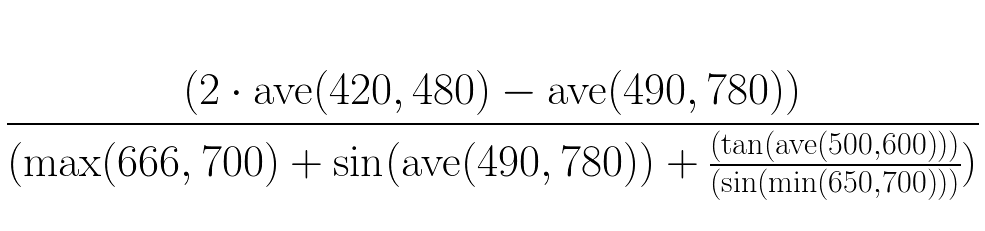

In [111]:
def bracketCoupler(_estr):
    leftBrackets = []
    coupleBrack = []
    #     estr= proto_eq
    for i in range(len(_estr)):
        if _estr[i] == '(':
            leftBrackets.append(i)
        elif _estr[i] == ')':
            coupleBrack.append([leftBrackets[-1], i])
            leftBrackets.pop(-1)
        print(_estr[i], leftBrackets, coupleBrack)
    return coupleBrack

def relaceOnce(_estr, coupleBrack):
    outstr = ''
    divisionPos=0
    for i in range(len(_estr)):
        if _estr[i] == r'/':
            print(i)
            topS, topE = 0, 0
            botS, botE = 0, 0
            divisionPos = i
            for _s, _e in coupleBrack:
                if _e + 1 == i:
                    topS = _s
                    topE = _e
                if  _s - 1 == i:
                    botS = _s
                    botE = _e
            break
    outstr += _estr[:topS] + r'\frac{' + _estr[topS:topE+1] + r'}{' +  _estr[botS:botE+1] + r'}' + _estr[botE+1:]
    return outstr

new_estr = proto_eq
for i in range(proto_eq.count('/')):
    new_brackets = bracketCoupler(new_estr)
    new_estr = relaceOnce(new_estr, new_brackets)
    print('\n\n\n',new_estr ,'\n\n\n')
imager(r'\['+ new_estr + r'\]')

In [112]:
import sympy

In [113]:
sympy.latex(eqin)

'(2*mean[420,480]- mean[490, 780])/( max[666,700] + sin(mean[490,780]) + (tan(mean[500,600]))/(sin(min[650,700])))'

In [114]:
x = 0
y = 2
s = '1+2**(x+y)'

In [115]:
sympy.latex(sympy.sympify(eqin))

TypeError: 'Symbol' object is not subscriptable

In [116]:
(sympy.sympify(proto_eq_variablename))

(2*var0 - var1)/(var2 + sin(var1) + tan(var3)/sin(var4))

var_{0} \mathrm{ave(420,480)} 
 \frac{2 \mathrm{ave(420,480)} - var_{1}}{var_{2} + \sin{\left(var_{1} \right)} + \frac{\tan{\left(var_{3} \right)}}{\sin{\left(var_{4} \right)}}}
var_{1} \mathrm{ave(490,780)} 
 \frac{2 \mathrm{ave(420,480)} - \mathrm{ave(490,780)}}{var_{2} + \sin{\left(\mathrm{ave(490,780)} \right)} + \frac{\tan{\left(var_{3} \right)}}{\sin{\left(var_{4} \right)}}}
var_{2} \mathrm{max(666,700)} 
 \frac{2 \mathrm{ave(420,480)} - \mathrm{ave(490,780)}}{\mathrm{max(666,700)} + \sin{\left(\mathrm{ave(490,780)} \right)} + \frac{\tan{\left(var_{3} \right)}}{\sin{\left(var_{4} \right)}}}
var_{3} \mathrm{ave(500,600)} 
 \frac{2 \mathrm{ave(420,480)} - \mathrm{ave(490,780)}}{\mathrm{max(666,700)} + \sin{\left(\mathrm{ave(490,780)} \right)} + \frac{\tan{\left(\mathrm{ave(500,600)} \right)}}{\sin{\left(var_{4} \right)}}}
var_{4} \mathrm{min(650,700)} 
 \frac{2 \mathrm{ave(420,480)} - \mathrm{ave(490,780)}}{\mathrm{max(666,700)} + \sin{\left(\mathrm{ave(490,780)} \right)} + \frac{\

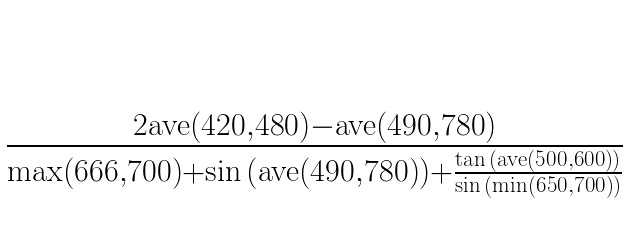

In [117]:
s = sympy.latex(sympy.sympify(proto_eq_variablename))
asdf = s
for i in range(len(variable)):
    asdf = asdf.replace(r'{}'.format(variable[i].varNameLatex), r'{}'.format(variable[i].latex))
    print(r'{}'.format(variable[i].varNameLatex), r'{}'.format(variable[i].latex), '\n', asdf)
imager("$" + asdf + '$')

In [47]:
srepl

'\\frac{2 var_{0} - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(var_{4} \\right)}}}'

In [56]:
r'{}'.format(variable[0].varNameLatex) in 

True

In [83]:
ss = str(s)

ss

'\\frac{2 var_{0} - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(var_{4} \\right)}}}'

In [86]:
ss.replace('var', '\mathrm{Ave(420,480)}')
print(ss)

\frac{2 var_{0} - var_{1}}{var_{2} + \sin{\left(var_{1} \right)} + \frac{\tan{\left(var_{3} \right)}}{\sin{\left(var_{4} \right)}}}


In [ ]:
variable[0].varNameLatex ==/ 

In [96]:
r" \frac{2 var_{0} - var_{1}}{var_{2} + \sin{\left(var_{1} \right)} + \frac{\tan{\left(var_{3} \right)}}{\sin{\left(var_{4} \right)}}}".replace(r"var_{4}", r"\mathrm{Ave(650,700)}")


' \\frac{2 var_{0} - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(\\mathrm{Ave(650,700)} \\right)}}}'

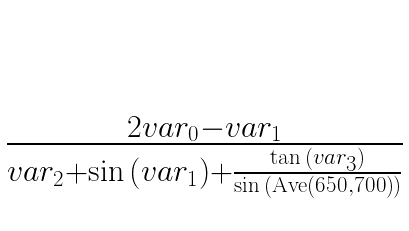

In [97]:
imager('$ \\frac{2 var_{0} - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(\\mathrm{Ave(650,700)} \\right)}}}$'
)

In [99]:
s.replace('var_{0}', 'HI')

'\\frac{2 HI - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(var_{4} \\right)}}}'

In [100]:
s

'\\frac{2 var_{0} - var_{1}}{var_{2} + \\sin{\\left(var_{1} \\right)} + \\frac{\\tan{\\left(var_{3} \\right)}}{\\sin{\\left(var_{4} \\right)}}}'